Nesse exercício a proposta foi combinar dados de duas APIs para fazer recomendações de filmes!

A API do TasteDive fornece um filme (ou bandas, programas de TV etc.) como entrada e retorna um conjunto de itens relacionados. 
Já a segunda API do OMDB fornece dados de um filme a partir do título como uma entrada.

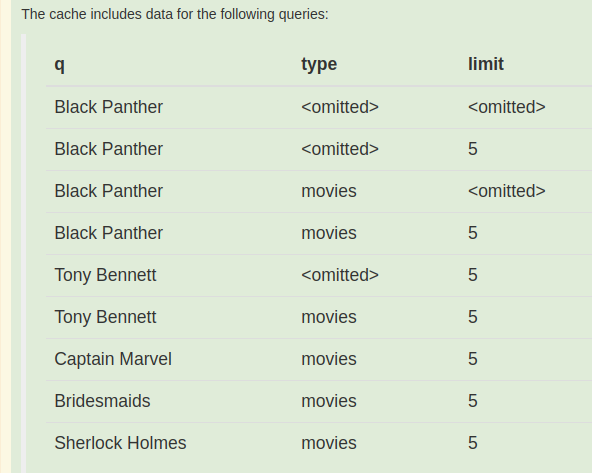

In [8]:
from PIL import Image
Image.open('parametros.png')

#os parametros para extrair os dados do cache da api

In [ ]:
def busca_filmes_do_tastedive(name):
    parametros = {"q": name, "type": "movies", "limit": 5}
    tastedive_response = requests_with_caching.get("https://tastedive.com/api/similar", params=parametrosparam)
    py_data = json.loads(tastedive_response.text)
    return py_data

Proximo passo é extrair uma lista com os titulos dos filmes 

In [ ]:
#função para extrair os titulos dos filmes da API
def extrai_titulos_filmes(dic):
    return ([i['Name'] for i in dic['Similar']['Results']])

#codigos para testar a função: itens relacionados ao filme bridesmaids e pantera negra
extrai_titulos_filmes(busca_filmes_do_tastedive("Tony Bennett"))
extrai_titulos_filmes(busca_filmes_do_tastedive("Black Panther"))

Proximo passo é criar uma função chamada buscar_titulos_relac que buscará a partir de uma lista de filmes como entrada, cinco filmes relacionados para cada um da API TasteDive e então, extrair os titulos dos filmes e armazenar em uma lista, sem duplica-los.

In [ ]:
def buscar_titulos_relac(movie_list):
    lst = []
    for movie in movie_list:
        lst.extend(extrai_titulos_filmes(busca_filmes_do_tastedive(movie)))
    return list(set(lst))


buscar_titulos_relac(["Black Panther", "Captain Marvel"])

Proximo passo é buscar os dados da segunda api (OMDB). 
A documentação está em https://www.omdbapi.com/


Primeira tarefa é criar uma função busca_dados_filmes que recebe uma string como parâmetro representando o título de um filme e retorna um dicionário com informações sobre o filme.

In [ ]:
def busca_dados_filmes(title):
    endpoint = 'http://www.omdbapi.com/'
    param = {}
    param['t'] = title
    param['r'] = 'json'
    cache_pagina = requests_with_caching.get(endpoint, params=param)

    return json.loads(cache_pagina.text)


cache_pagina("Venom")
cache_pagina("Baby Mama")

Agora o proximo passo é buscar as avaliações dos filmes. Em uma função que recebe um filme em um dicionário extrai a classificação do filme como um numero inteiro.

In [ ]:
def busca_avaliacoes_filmes(title_dict):
    rating = ""
    for rating_list in title_dict["Ratings"]:
        if rating_list["Source"]== "Rotten Tomatoes":
            rating = rating_list["Value"]
    if rating != "":
        int_rating = int(rating[:2])
    else: int_rating = 0
    return int_rating

busca_avaliacoes_filmes(busca_dados_filmes("Deadpool 2"))